Building model up simultaneously to geomodeller.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sys.path.append('C:\\Users\\elisa\\Documents\\git\\mplstereonet')
sys.path.append('C:\\Users\\elisa\\Documents\\git\\gempy')
import mplstereonet
import gempy as gp
#from importlib import reload
import os
#sys.path.append('C:\\Users\\elisa\\Documents\\git\\remote-geomod')  # append local path to access rgeomod module
import pandas as pn

#import rgeomod

import gdal
import skimage
import scipy
import linecache
from mpl_toolkits.mplot3d import Axes3D
from copy import copy

import seaborn as sns

In [2]:
path_interf = "C:\\Users\\elisa\\Documents\\git\\elthesis\\notebooks\\data_raw\\final\\Points_2faults.csv"
path_orient = "C:\\Users\\elisa\\Documents\\git\\elthesis\\notebooks\\data_raw\\final\\Foliations_2faults.csv"
path_orient2 = "C:\\Users\\elisa\\Documents\\git\\elthesis\\notebooks\\data_raw\\final\\Foliations_2faults_k20_f10.csv"

In [3]:
resolution = [50,50,50]
extent = np.array([777000, 794500, 6345000, 6353000, -1500, 1000])

In [4]:
geo_data = gp.create_data(extent = extent, resolution = resolution,
                        path_i = path_interf,
                        path_o = path_orient2)

In [5]:
#sorting of lithologies
gp.set_series(geo_data,{'fault_NWSE':('fault_NWSE'),
                        'fault_NS':('fault_NS'),
                        #'fault_NESW2':('fault_NESW2'),
                        #'fault_NESW1':('fault_NESW1'),
                        #'fault_NESW3':('fault_NESW3'),
                        #'fault_NESW4':('fault_NESW4'),
                        'Trias_Series':('Liassic','Triassic'), 
                        'Carbon_Series':('Carboniferous'), 
                        'Basement_Series':('basement')},
             order_formations=['fault_NWSE','fault_NS',
                               #'fault_NESW2','fault_NESW1','fault_NESW3','fault_NESW4',
                               'Liassic','Triassic','Carboniferous','basement'])

In [6]:
alesmodel = {'Liassic':'#015482', 'Triassic': '#9f0052', 'Carboniferous':'#ffbe00','basement':'#728f02',
            'fault_NWSE':'#7e7e7e','fault_NS':'#7e7e7e'}


In [7]:
geo_data.set_colors(alesmodel)

,value,formation_number,color
fault_NWSE,1,1,#7e7e7e
fault_NS,2,2,#7e7e7e
Liassic,3,3,#015482
Triassic,4,4,#9f0052
Carboniferous,5,5,#ffbe00
basement,6,6,#728f02


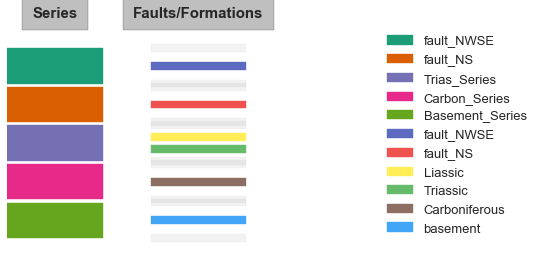

In [8]:
gp.get_sequential_pile(geo_data)

No handles with labels found to put in legend.


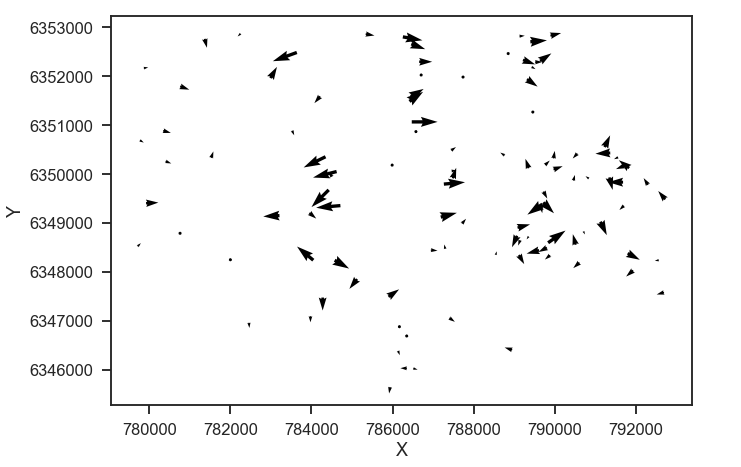

In [9]:
gp.plotting.plot_data(geo_data,direction='z', data_type='orientations')
#plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\unclusteredorient_only.png", format='png', dpi=1000)

#### Topography

In [11]:
#topography
path_dtm='C:\\Users\\elisa\\Documents\\Ales\\DISTRIB_2018\\MNT\\MNT_Dx25m_ALES_L93.asc'
folder= "C:\\Users\\elisa\\Documents\\git\\MSc\\GempyTopography\\unwichtig"
xyz_path = "C:\\Users\\elisa\\Documents\\git\\MSc\\GempyTopography\\XYZ.csv"

In [12]:
from gempy.utils import topography

In [13]:
elevation = topography.DEM(path_dtm, geo_data,output_path = folder,interpdata=interp_data)

Extents of geo_data and DEM do not match. DEM is cropped and stored as C:\Users\elisa\Documents\git\MSc\GempyTopography\unwichtig_cropped_DEM.tif


Raster extent: [ 777000  794500 6345000 6353000     138     730] 
Raster resolution: [320 700]


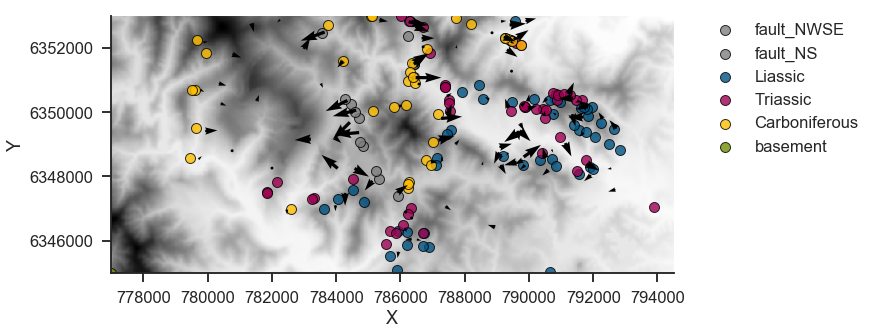

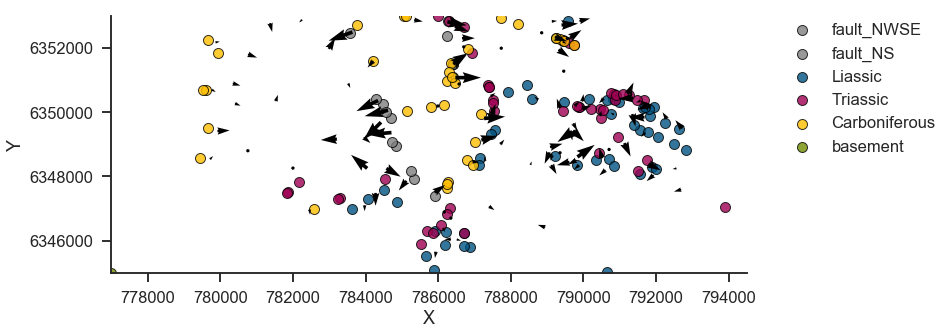

In [14]:
elevation.show(plot_data=True)
gp.plotting.plot_data(geo_data,direction='z')
#plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\datatopo.png", format='png', dpi=1000)

In [10]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float64',theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2


In [ ]:
geomap = elevation.calculate_geomap(interpdata=interp_data)

In [ ]:
gp.plotting.plot_map(geo_data,topography=elevation)

### test

In [17]:
import importlib
importlib.reload(gp.posterior_analysis_elisa)

<module 'gempy.posterior_analysis_elisa' from 'C:\\Users\\elisa\\Documents\\git\\gempy\\gempy\\posterior_analysis_elisa.py'>

In [15]:
from gempy.posterior_analysis_elisa import Posterior

In [16]:
dbname='C:\\Users\\elisa\\Documents\\git\\elthesis\\notebooks\\databases\\final\\Model3_filt_1102_i30.hdf5'

In [17]:
post = Posterior(dbname,interpdata=interp_data,geodata=geo_data, topography=elevation)

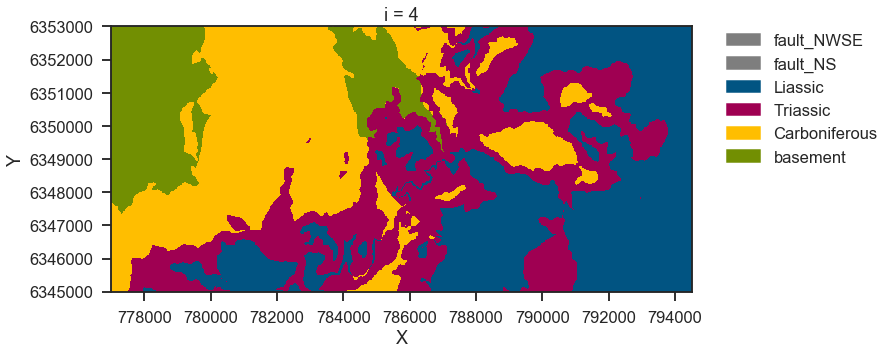

In [19]:
for i in range(0,5):
    post.plot_map(i)
    plt.title("i = %.d"%i)
    plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\post_map"+str(i))

In [ ]:
###test

In [11]:
lith_block, fault_block = gp.compute_model(interp_data)

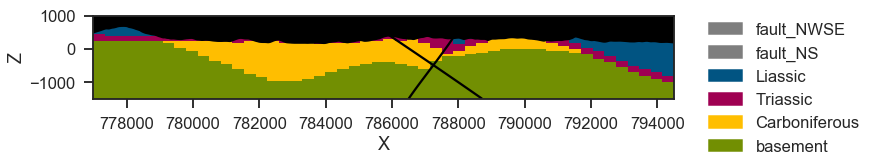

In [19]:
gp.plot_section(geo_data, lith_block[0], cell_number=5,  direction='y', topography=elevation)
gp.plotting.extract_countours(geo_data,interp_data,fb=fault_block,cell_number=5,direction='y')

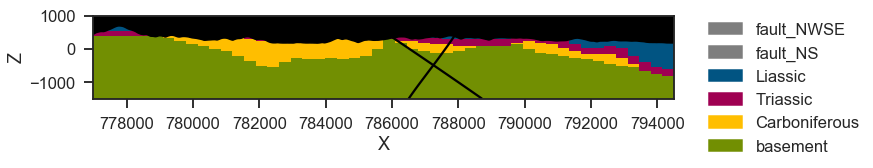

In [20]:
gp.plot_section(geo_data, lith_block[0], cell_number=15,  direction='y', topography=elevation)
gp.plotting.extract_countours(geo_data,interp_data,fb=fault_block,cell_number=5,direction='y')

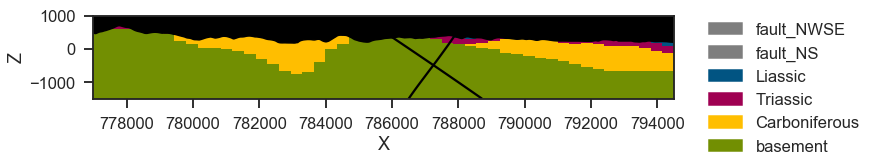

In [21]:
gp.plot_section(geo_data, lith_block[0], cell_number=25,  direction='y', topography=elevation)
gp.plotting.extract_countours(geo_data,interp_data,fb=fault_block,cell_number=5,direction='y')

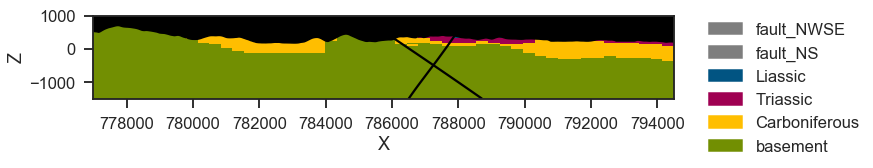

In [22]:
gp.plot_section(geo_data, lith_block[0], cell_number=35,  direction='y', topography=elevation)
gp.plotting.extract_countours(geo_data,interp_data,fb=fault_block,cell_number=5,direction='y')

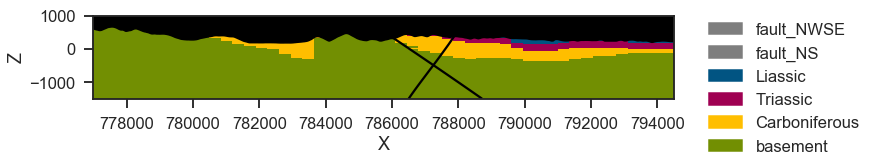

In [23]:
gp.plot_section(geo_data, lith_block[0], cell_number=45,  direction='y', topography=elevation)
gp.plotting.extract_countours(geo_data,interp_data,fb=fault_block,cell_number=5,direction='y')

In [25]:
lith_map, fault_map = gp.compute_model_at(elevation.surface_coordinates[0], interp_data)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\elisa\Anaconda3\envs\rootclone\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-2331cf9b8a57>", line 1, in <module>
    lith_map, fault_map = gp.compute_model_at(elevation.surface_coordinates[0], interp_data)
  File "C:\Users\elisa\Documents\git\gempy\gempy\gempy_front.py", line 155, in compute_model_at
    sol = compute_model(interp_data, output=output, u_grade=u_grade, get_potential_at_interfaces=get_potential_at_interfaces)
  File "C:\Users\elisa\Documents\git\gempy\gempy\gempy_front.py", line 91, in compute_model
    sol = interp_data.th_fn(*i)
  File "C:\Users\elisa\Anaconda3\envs\rootclone\lib\site-packages\theano\compile\function_module.py", line 903, in __call__
    self.fn() if output_subset is None else\
  File "C:\Users\elisa\Anaconda3\envs\rootclone\lib\site-packages\theano\scan_module\scan_op.py", line 963, in rval
 

KeyboardInterrupt: 

In [ ]:
lith_map[0].reshape(324, 588)

In [ ]:
gp.plotting.plot_map(geo_data, geomap=np.flip(lith_map[0].reshape(324, 588),axis=0),plot_data=True)
gp.plotting.extract_countours(geo_data,interp_data, fb=fault_map, lb=lith_map)

In [99]:
geo_data.resolution

array([30, 30, 30])

In [21]:
ver , sim = gp.get_surfaces(interp_data,lith_block[1],(fault_block[1], fault_block[3], fault_block[5]))

In [22]:
gp.plotting.plot_surfaces_3D(geo_data, ver, sim, plot_data=False)

closing vtk
